# ASSIGNMENT 4

# SOCIAL MEDIA WEB SCRAPPING

In [35]:
# Importing Praw

import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="GpV40zz2EDeH9lj2fwouFA",
    client_secret="MctonRYFTONfkYtKqyE3ZtQ9emHvng",
    user_agent=user_agent
)

In [36]:
# Importing requyired libraries

import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [14]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Game devs praise Steam as a 'democratic platform' that 'continues to be transformative' for PC gaming today | "It's just a great constant in our industry that is [otherwise] really in f***ing panic mode."
1cerl2b
chrisdh79
1714258965.0
1631
0.94
https://www.pcgamer.com/gaming-industry/game-devs-praise-steam-as-a-democratic-platform-that-continues-to-be-transformative-for-pc-gaming-today/
0


In [15]:
headlines = set()
for submission in reddit.subreddit("technology").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

561


In [16]:
#Create a dataframe from the scrapped data 

tech_df = pd.DataFrame(headlines)
tech_df.head()


,0
0,Deepfakes of Bollywood stars spark worries of ...
1,Turning piezoelectric materials and lithium-io...
2,Japan may turn up heat on Apple and Google wit...
3,UK e-visa rollout begins today: no more immigr...
4,Apple loses smartphone crown to Samsung as Chi...


In [20]:
tech_df.columns

RangeIndex(start=0, stop=1, step=1)

In [21]:
tech_df.columns = ['Titles']

In [22]:
tech_df.head()

,Titles
0,Deepfakes of Bollywood stars spark worries of ...
1,Turning piezoelectric materials and lithium-io...
2,Japan may turn up heat on Apple and Google wit...
3,UK e-visa rollout begins today: no more immigr...
4,Apple loses smartphone crown to Samsung as Chi...


In [23]:
tech_df.Titles.duplicated().sum() 

0

In [24]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
tech_df["Titles"]= tech_df["Titles"].apply(cleanTxt)

#Show the clean text
tech_df.head()

,Titles
0,Deepfakes of Bollywood stars spark worries of ...
1,Turning piezoelectric materials and lithium-io...
2,Japan may turn up heat on Apple and Google wit...
3,UK e-visa rollout begins today no more immigra...
4,Apple loses smartphone crown to Samsung as Chi...


In [25]:
#Next we have to remove emoji & Unicode from the reddit data.

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
tech_df["Titles"]= tech_df["Titles"].apply(remove_emoji)

#Show the clean text
tech_df.head()

,Titles
0,Deepfakes of Bollywood stars spark worries of ...
1,Turning piezoelectric materials and lithium-io...
2,Japan may turn up heat on Apple and Google wit...
3,UK e-visa rollout begins today no more immigra...
4,Apple loses smartphone crown to Samsung as Chi...


In [26]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [28]:
#Create a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
tech_df['Subjectivity'] = tech_df['Titles'].apply(getSubjectivity)
tech_df['Polarity'] = tech_df['Titles'].apply(getPolarity)

#Now display data
tech_df.head()

,Titles,Subjectivity,Polarity
0,Deepfakes of Bollywood stars spark worries of ...,0.00,0.00
1,Turning piezoelectric materials and lithium-io...,0.40,0.40
2,Japan may turn up heat on Apple and Google wit...,0.00,0.00
3,UK e-visa rollout begins today no more immigra...,0.50,-0.25
4,Apple loses smartphone crown to Samsung as Chi...,0.05,-0.15


In [29]:
#Group the range of Polarity to different categories

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
tech_df["Insight"] = tech_df["Polarity"].apply(getInsight)

tech_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Deepfakes of Bollywood stars spark worries of ...,0.000000,0.000000,Neutral
1,Turning piezoelectric materials and lithium-io...,0.400000,0.400000,Positive
2,Japan may turn up heat on Apple and Google wit...,0.000000,0.000000,Neutral
3,UK e-visa rollout begins today no more immigra...,0.500000,-0.250000,Negative
4,Apple loses smartphone crown to Samsung as Chi...,0.050000,-0.150000,Negative
5,TSMC races for chip supremacy with new A16 pro...,0.526515,0.212121,Positive
6,Microsoft says cloud AI demand is exceeding su...,0.000000,0.000000,Neutral
7,The specific process by which Google enshittif...,0.125000,0.000000,Neutral
8,The Taylor Swift Album Leak’s Big AI Problem,0.100000,0.000000,Neutral
9,Bad news for Apple and Meta Kids are bored wit...,0.833333,-0.600000,Negative


In [30]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data Visualization

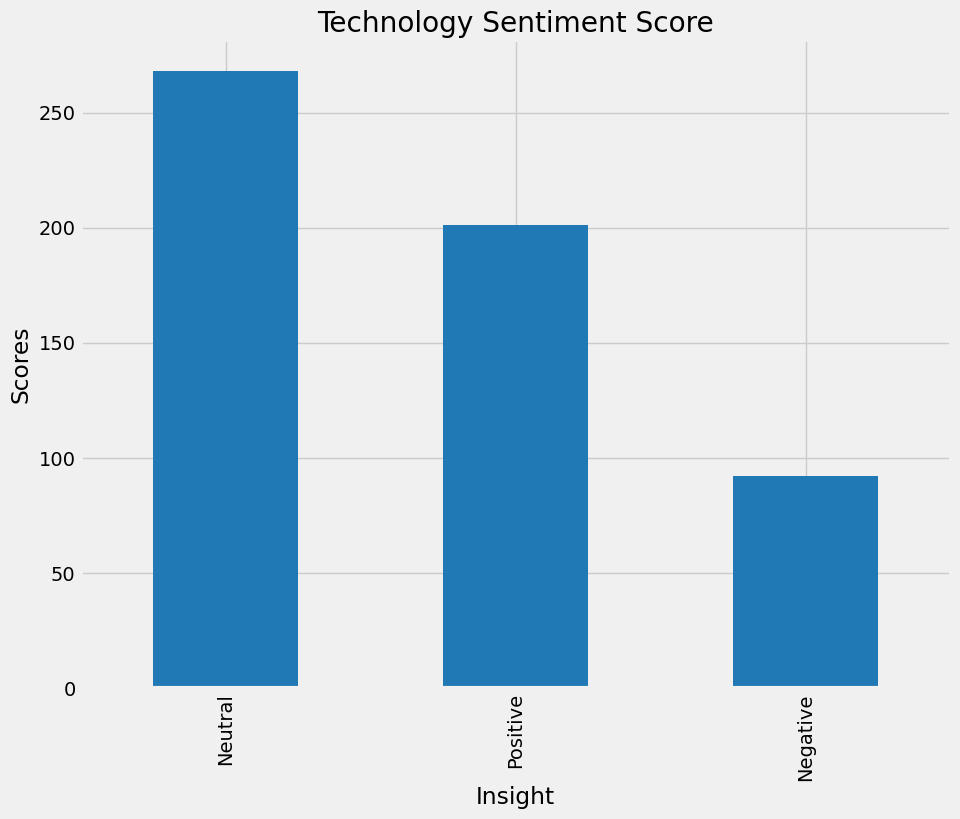

In [32]:
#Plot the values count of sentiment

plt.title("Technology Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
tech_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()


# Wordcloud

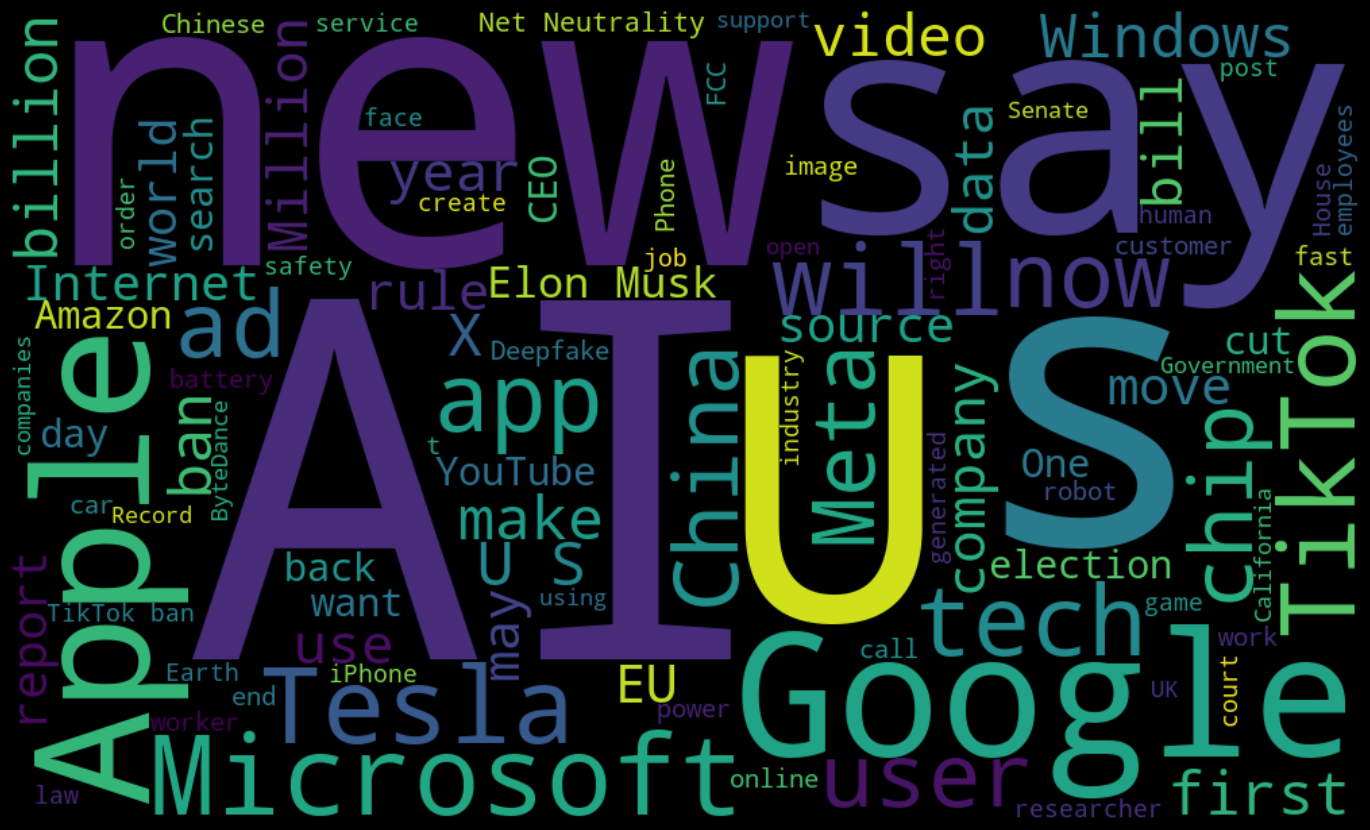

In [34]:
text = ' '.join( [twts for twts in tech_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");